<a href="https://colab.research.google.com/github/colella2/ReinforcementLearning_Assignment2/blob/master/Annie_Reinforcement_Learning_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy==1.19.1
!pip install --upgrade quantecon

import quantecon as q
from quantecon import MarkovChain

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(print (np.__version__))


Requirement already up-to-date: quantecon in /usr/local/lib/python3.6/dist-packages (0.4.8)
1.19.1
None


In [ ]:
P_mat = np.array([[0.80,0.10,0.10],[0.01,0.98 ,0.01],[0.10,0.10,0.80]])
P_mat

array([[0.8 , 0.1 , 0.1 ],
       [0.01, 0.98, 0.01],
       [0.1 , 0.1 , 0.8 ]])

**Construct the transition probability from 
(
s
,
e
)
 to 
(
s
′
,
e
′
)
 for each action 
a
∈
{
0
,
1
,
2
}
.** 



a
∈∈
{
0
,
1
,
2
}
  and 
s
∈
{
0
,
1
,
2
,
3
,
4
} and e
∈
{
0
,
1
,
2
}


 s' >= e' always

In [ ]:
#(15x15 matrix)
index=[]
for s in range(5):
  for e in range(3):
    index.append((s,e)) 

zeroes=np.zeros((15,15))
trans_mat = pd.DataFrame(zeroes,index=index,columns=index)
trans_mat

,"(0, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(1, 2)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(0, 2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1, 2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2, 2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(3, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Action = 0

When a = 0, s' = e', so all else elements should be zero

In [ ]:
trans_mat_0=trans_mat.copy()
for (s,e) in index:
  for (s_,e_) in index:
    if (s_==e_) & (s>=e):
     trans_mat_0.at[(s,e),(s_,e_)]=P_mat[e,e_]
trans_mat_0

,"(0, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(1, 2)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.80,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0
"(0, 1)",0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
"(0, 2)",0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
"(1, 0)",0.80,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0
"(1, 1)",0.01,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
"(1, 2)",0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
"(2, 0)",0.80,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0
"(2, 1)",0.01,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
"(2, 2)",0.10,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.80,0.0,0.0,0.0,0.0,0.0,0.0
"(3, 0)",0.80,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0


Action = 1

Conditions:
1. When a = 1, s' = 1 + e'
2. s > = e , you can't have more than what was given that day
3. s>=1, you can't save 1 unless you have atleast 1

In [ ]:
trans_mat_1=trans_mat.copy()
for (s,e) in index:
  for (s_,e_) in index:
    if (s_==e_+1) & (s>=e)  & (s>=1):
     trans_mat_1.at[(s,e),(s_,e_)]=P_mat[e,e_]
trans_mat_1

,"(0, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(1, 2)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
"(0, 1)",0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
"(0, 2)",0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
"(1, 0)",0.0,0.0,0.0,0.80,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.10,0.0,0.0,0.0
"(1, 1)",0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.01,0.0,0.0,0.0
"(1, 2)",0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
"(2, 0)",0.0,0.0,0.0,0.80,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.10,0.0,0.0,0.0
"(2, 1)",0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.01,0.0,0.0,0.0
"(2, 2)",0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.80,0.0,0.0,0.0
"(3, 0)",0.0,0.0,0.0,0.80,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.10,0.0,0.0,0.0


Action = 2

Conditions:
1. When a = 2, s' =2+ e'
2. s > = e , you can't have more than what was given that day
3. s>=2, you can't save 2 unless you have atleast 2

In [ ]:
trans_mat_2=trans_mat.copy()
for (s,e) in index:
  for (s_,e_) in index:
    if (s_==e_+2) & (s>=e) & (s>=2):
     trans_mat_2.at[(s,e),(s_,e_)]=P_mat[e,e_]
trans_mat_2

,"(0, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(1, 2)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00
"(0, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00
"(0, 2)",0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00
"(1, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00
"(1, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00
"(1, 2)",0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00
"(2, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.80,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.10
"(2, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.98,0.0,0.0,0.0,0.01
"(2, 2)",0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.80
"(3, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.80,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.10


**The child subjected utility from eating ice cream is 
log
(
c
+
1
)
 if 
c
≥
0
 and 
−
∞
 otherwise. Construct the reward matrix for each transition 
(
s
,
e
,
a
)
 and 
(
s
′
,
e
′
)
.**

In [ ]:
R_mat = np.empty((15,15))
R_mat.fill('-1000000000000000000000000')
R_mat = pd.DataFrame(R_mat,index=index,columns=index)
R_mat

,"(0, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(1, 2)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24
"(0, 1)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24
"(0, 2)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24
"(1, 0)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24
"(1, 1)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24
"(1, 2)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24
"(2, 0)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24
"(2, 1)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24
"(2, 2)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24
"(3, 0)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24


c
∈
{
0
,
1
,
2
,
3
,
4
}

Action = 0

 c = s - a = s 




In [ ]:
R_mat_0=R_mat.copy()
for (s,e) in index:
  for (s_,e_) in index:
    if s >= 0: #since c= s
      R_mat_0.at[(s,e),(s_,e_)]=np.log(s+1)
R_mat_0

,"(0, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(1, 2)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(0, 1)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(0, 2)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(1, 0)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(1, 1)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(1, 2)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(2, 0)",1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612
"(2, 1)",1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612
"(2, 2)",1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612
"(3, 0)",1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294


Action = 1

c = s - 1 

In [ ]:
R_mat_1=R_mat.copy()
for (s,e) in index:
  for (s_,e_) in index:
    if s - 1 >= 0: #since c= s
      R_mat_1.at[(s,e),(s_,e_)]=round(np.log(s),3)
R_mat_1

,"(0, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(1, 2)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24
"(0, 1)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24
"(0, 2)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24
"(1, 0)",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
"(1, 1)",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
"(1, 2)",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
"(2, 0)",6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01
"(2, 1)",6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01
"(2, 2)",6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01
"(3, 0)",1.099000e+00,1.099000e+00,1.099000e+00,1.099000e+00,1.099000e+00,1.099000e+00,1.099000e+00,1.099000e+00,1.099000e+00,1.099000e+00,1.099000e+00,1.099000e+00,1.099000e+00,1.099000e+00,1.099000e+00


Action = 2

c = s - 2

In [ ]:
R_mat_2=R_mat.copy()
for (s,e) in index:
  for (s_,e_) in index:
    if s - 2 >= 0: #since c= s
      R_mat_2.at[(s,e),(s_,e_)]=round(np.log(s-2+1),3)
R_mat_2

,"(0, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(1, 2)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24
"(0, 1)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24
"(0, 2)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24
"(1, 0)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24
"(1, 1)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24
"(1, 2)",-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24,-1.000000e+24
"(2, 0)",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
"(2, 1)",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
"(2, 2)",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
"(3, 0)",6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01,6.930000e-01


**Apply the value iteration approach to compute the value function for each state 
(
s
,
e
)
 and optimal policy. Iterate 
600
 times**

In [ ]:
# All transition probabilities into one matrix
P = np.array([trans_mat_0, trans_mat_1, trans_mat_2],dtype=float)
P.shape

RR =np.array([R_mat_0, R_mat_1, R_mat_2],dtype=float)
RR.shape

(3, 15, 15)

In [ ]:
K,N,M = P.shape #K=Actions possible, N = states 

q = np.zeros((K,N,1),dtype=np.float64) 
for i in range(0,N):
    for k in range(0,K):
        for j in range(0,M):
            q[k,i,0] = q[k,i,0] + RR[k,i,j]*P[k,i,j]

In [ ]:
T=600
v = np.zeros((N,T),dtype=np.float64)
d = np.zeros((N,T),dtype=np.float64)
for n in range(1,T):
    for i in range(0,N):
        rhs = np.zeros((1,K),dtype=np.float64)
        for k in range(0,K):
            rhs[0][k] = q[k][i][0] + np.matmul(P[k,i,:],v[:,n-1]) 
        v[i,n] = max(rhs[0])
        d[i,n] = np.argmax(rhs[0])
v = v.T #(600,15)
d = d.T

**Q4 For each 
e
, plot the value function 
v
(
s
,
e
)
 with 
s
 on the x-axis. (hint: there should be 3 lines plots, one for each 
e
∈
{
0
,
1
,
2
}
.)**

In [ ]:
vf = pd.DataFrame(v, columns=index) #the last iteration
#dropping the impossible states
vf =vf.replace(0,np.nan).dropna(axis=1,how="all") #all states with s < e have 0 in them because they are impossible
vf

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.693147,0.693147,1.098612,1.098612,1.098612,1.386294,1.386294,1.386294,1.609438,1.609438,1.609438
2,0.179176,0.872323,1.383418,1.496008,1.790434,2.046817,1.902008,2.196434,2.387211,2.277463,2.484649,2.674211
3,0.486364,1.179511,2.071156,1.808623,2.480221,2.892325,2.376871,2.887208,3.275045,2.782871,3.293208,3.607613
4,0.885439,1.578587,2.756667,2.212136,3.168162,3.679009,2.789381,3.576626,4.085009,3.195381,3.982626,4.454674
...,...,...,...,...,...,...,...,...,...,...,...,...
595,399.010484,399.703631,401.854070,400.358421,402.414941,402.920672,400.975892,402.945335,403.363991,401.381892,403.351335,403.769991
596,399.685861,400.379009,402.529447,401.033798,403.090319,403.596050,401.651269,403.620712,404.039368,402.057269,404.026712,404.445368
597,400.361239,401.054386,403.204824,401.709176,403.765696,404.271427,402.326647,404.296090,404.714746,402.732647,404.702090,405.120746
598,401.036616,401.729763,403.880202,402.384553,404.441074,404.946805,403.002024,404.971467,405.390123,403.408024,405.377467,405.796123


In [ ]:
vf.iloc[599][1,0]

402.405140802624

In [ ]:
e_0=[]
e_1=[]
e_2=[]
for s,e in vf.columns:
  if e ==0:
    e_0.append([s,vf.iloc[599][s,e]])  
  if e ==1:
    e_1.append([s,vf.iloc[599][s,e]])  
  if e ==2:
    e_2.append([s,vf.iloc[599][s,e]])  
e_2

[[2, 405.6221820853072], [3, 406.06550037300497], [4, 406.471500373005]]

Text(0.5, 1.0, 'Value Function per Action')

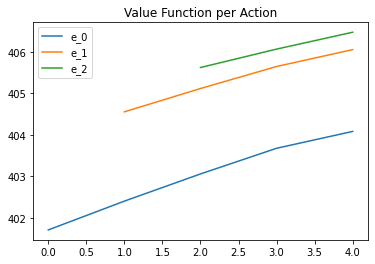

In [ ]:
s=range(5)
x0, y0 = zip(*e_0)
x1, y1 = zip(*e_1)
x2, y2 = zip(*e_2)

plt.plot(x0, y0,label='e_0')
plt.plot(x1, y1,label='e_1')
plt.plot(x2, y2,label='e_2')
plt.legend()
plt.title('Value Function per Action')

**For each 
e
, plot the optimal policy for storing ice cream scoops 
a
(
s
,
e
)
 with 
s
 on the x-axis. (hint: there should be 3 lines plots, one for each 
e
∈
{
0
,
1
,
2
}
.)**

In [ ]:
policy = pd.DataFrame(d, columns=index)
#drop infeasible rows
for s,e in index:
  if s<e:
    policy.drop([(s,e)],axis=1,inplace=True)
policy   

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,2.0,2.0,2.0
4,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
596,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
597,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
598,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0


In [ ]:
e_0=[]
e_1=[]
e_2=[]
for s,e in policy.columns:
  if e ==0:
    e_0.append([s,policy.iloc[599][s,e]])  
  if e ==1:
    e_1.append([s,policy.iloc[599][s,e]])  
  if e ==2:
    e_2.append([s,policy.iloc[599][s,e]])  
e_2

[[2, 1.0], [3, 2.0], [4, 2.0]]

Text(0.5, 1.0, 'Optimal Policy for storing per action')

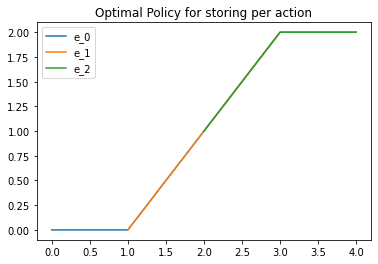

In [ ]:
s=range(5)
x0, y0 = zip(*e_0)
x1, y1 = zip(*e_1)
x2, y2 = zip(*e_2)

plt.plot(x0, y0,label='e_0') #overlapping
plt.plot(x1, y1,label='e_1')
plt.plot(x2, y2,label='e_2')
plt.legend()
plt.title('Optimal Policy for storing per action')

**For each 
e
, plot the optimal policy for consuming ice cream scoops 
c
(
s
,
e
)
 with 
s
 on the x-axis. (hint: there should be 3 lines plots, one for each 
e
∈
{
0
,
1
,
2
}
.)**

In [ ]:
#c = s - a
e_0=[]
e_1=[]
e_2=[]
for s,e in policy.columns:
  if e ==0:
    e_0.append([s,s-policy.iloc[599][s,e]])  
  if e ==1:
    e_1.append([s,s-policy.iloc[599][s,e]])  
  if e ==2:
    e_2.append([s,s-policy.iloc[599][s,e]])  
e_2

[[2, 1.0], [3, 1.0], [4, 2.0]]

Text(0.5, 1.0, 'Optimal Policy for consuming per action')

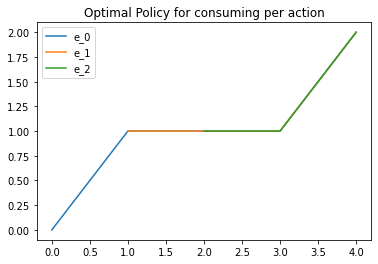

In [ ]:
s=range(5)
x0, y0 = zip(*e_0)
x1, y1 = zip(*e_1)
x2, y2 = zip(*e_2)

plt.plot(x0, y0,label='e_0') #overlapping
plt.plot(x1, y1,label='e_1')
plt.plot(x2, y2,label='e_2')
plt.legend()
plt.title('Optimal Policy for consuming per action')

**Simulate a sequence of 
e
 and set an initial value for 
s
. Given the optimal policy, calculate and plot the evolution of 
a
, 
c
, and 
s
 over time**

In [ ]:
ts_length=100
mc = MarkovChain(P_mat)
sim = mc.simulate(ts_length=ts_length,init=0) #inititalization of e is 2
sim

array([0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#s initialization = 1
s_=1
total_sim=[]
for i in range(ts_length):
  s=s_
  e=sim[i]
  a=policy.iloc[599][s,e]
  total_sim.append([s,e,a])
  if i != ts_length - 1:
      s_= a + sim[i+1]

In [ ]:
s=[i[0] for i in total_sim]
e=[i[1] for i in total_sim]
a=[i[2] for i in total_sim]

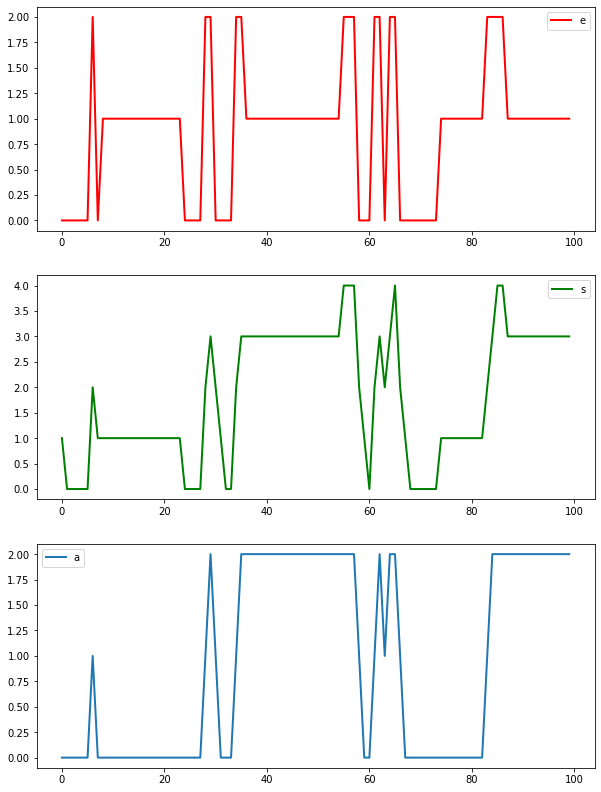

In [ ]:
#plot transitions as a function of time
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(10, 14))
ax1.plot(e,lw=2,label='e',color='r')
ax1.legend()
ax2.plot(s,lw=2,label='s',color='g')
ax2.legend()
ax3.plot(a,lw=2,label='a')
ax3.legend()
#np.mean(X == 0)

**Construct the transition probability and reward matrices between 
(
s
,
e
)
 and 
(
s
′
,
e
′
)
 that produces the highest expected discount rewards. (hint: you need to use the optimal policy)**

In [ ]:
T_prob=np.zeros((12,12))
T_prob = pd.DataFrame(T_prob,index=policy.columns,columns=policy.columns)
print(T_prob.shape)

R_mat=np.zeros((12,12))
R_mat = pd.DataFrame(R_mat,index=policy.columns,columns=policy.columns)
R_mat.shape

(12, 12)


(12, 12)

In [ ]:
for s,e in policy.columns:
  for s_,e_ in policy.columns:
    if policy.at[599,(s,e)]==0:
      T_prob.at[(s,e),(s_,e_)] = trans_mat_0.at[(s,e),(s_,e_)]
    if policy.at[599,(s,e)]==1:
      T_prob.at[(s,e),(s_,e_)] = trans_mat_1.at[(s,e),(s_,e_)]
    if policy.at[599,(s,e)]==2:
      T_prob.at[(s,e),(s_,e_)] = trans_mat_2.at[(s,e),(s_,e_)]
T_prob #transition Probability Matrix

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.80,0.00,0.10,0.00,0.00,0.10,0.0,0.00,0.00,0.0,0.0,0.00
"(1, 0)",0.80,0.00,0.10,0.00,0.00,0.10,0.0,0.00,0.00,0.0,0.0,0.00
"(1, 1)",0.01,0.00,0.98,0.00,0.00,0.01,0.0,0.00,0.00,0.0,0.0,0.00
"(2, 0)",0.00,0.80,0.00,0.00,0.10,0.00,0.0,0.00,0.10,0.0,0.0,0.00
"(2, 1)",0.00,0.01,0.00,0.00,0.98,0.00,0.0,0.00,0.01,0.0,0.0,0.00
"(2, 2)",0.00,0.10,0.00,0.00,0.10,0.00,0.0,0.00,0.80,0.0,0.0,0.00
"(3, 0)",0.00,0.00,0.00,0.80,0.00,0.00,0.0,0.10,0.00,0.0,0.0,0.10
"(3, 1)",0.00,0.00,0.00,0.01,0.00,0.00,0.0,0.98,0.00,0.0,0.0,0.01
"(3, 2)",0.00,0.00,0.00,0.10,0.00,0.00,0.0,0.10,0.00,0.0,0.0,0.80
"(4, 0)",0.00,0.00,0.00,0.80,0.00,0.00,0.0,0.10,0.00,0.0,0.0,0.10


In [ ]:
RR[2,6,].shape

(15,)

In [ ]:
for s,e in policy.columns:
  for s_,e_ in policy.columns:
    if policy.at[599,(s,e)]==0:
      R_mat.at[(s,e),(s_,e_)] = R_mat_0.at[(s,e),(s_,e_)]
    if policy.at[599,(s,e)]==1:
      R_mat.at[(s,e),(s_,e_)] = R_mat_1.at[(s,e),(s_,e_)]
    if policy.at[599,(s,e)]==2:
      R_mat.at[(s,e),(s_,e_)] = R_mat_2.at[(s,e),(s_,e_)]
R_mat #Reward Matrix

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(1, 0)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(1, 1)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(2, 0)",0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000
"(2, 1)",0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000
"(2, 2)",0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000
"(3, 0)",0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000
"(3, 1)",0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000
"(3, 2)",0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000,0.693000
"(4, 0)",1.099000,1.099000,1.099000,1.099000,1.099000,1.099000,1.099000,1.099000,1.099000,1.099000,1.099000,1.099000


**Calculate the value function for the Markov process with rewards that produces the highest expected discount rewards. (hint: use the transition probability and reward matrices from the previous question). Does the value function matches reasonably the value function from the previous question? (hint: it should)**

In [ ]:
#markov process with rewards ex2.4

**Simulate the Markov process with rewards from the previous question for starting at each state pair 
(
e
,
s
)
. Compute the average discounted reward. Does it match reasonabily close to the value function in the previous question? (hint: it should)**

**Calculate the optimal policy based on the policy iteration approach.**

In [ ]:
N,M,K = P.shape
q = np.zeros((K,N,1),dtype=np.float64)
for i in range(0,N):
    for k in range(0,K):
        for j in range(0,M):
            q[k,i,0] = q[k,i,0] + RR[k,i,j]*P[k,i,j]

PP = np.zeros((N,N),dtype=np.float64)
qvec = np.zeros((N,1),dtype=np.float64)
for n in range(1,T):
    for i in range(0,N):
        rhs = np.zeros((1,K),dtype=np.float64)
        for k in range(0,K):
            rhs[0][k] = q[k][i][0] + np.matmul(P[k,i,:],v[:,n-1]) 
        v[i,n] = max(rhs[0])
        d[i,n] = np.argmax(rhs[0])
    for i in range(0,N):
        PP[i,:] = P[d[i,n],i,:]
    
    A = np.concatenate((np.identity(N)-PP,np.ones((N,1))),axis=1)
    A = np.delete(A,N-1,1)
    
    for i in range(0,N):
        qvec[i,0] = q[d[i,n],i,0]
    tmp = np.matmul(np.linalg.inv(A),qvec)
    g[0,n] = tmp[N-1]
    tmp[N-1] = 0
    v[:,n] = tmp.T
v = v.T
d = d.T
g = g.T